In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

In [50]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('/content/drive/My Drive/Ferdosi/Ferdosi/*.txt'))

import unicodedata
import string

category_lines = {}
all_categories = []
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

['/content/drive/My Drive/Ferdosi/Ferdosi/ferdosi.txt']


In [51]:
# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return lines

for filename in findFiles('/content/drive/My Drive/Ferdosi/Ferdosi/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [52]:
filename = '/content/drive/My Drive/Ferdosi/Ferdosi/ferdosi.txt'
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

lines = readLines(filename)
lines

['به نام خداوند جان و خرد , کزین برتر اندیشه برنگذرد',
 'خداوند نام و خداوند جای , خداوند روزی ده رهنمای',
 'خداوند کیوان و گردان سپهر , فروزنده ماه و ناهید و مهر',
 'ز نام و نشان و گمان برترست , نگارنده بر شده پیکرست',
 'به بینندگان افریننده را , نبینی مرنجان دو بیننده را',
 'نیابد بدو نیز اندیشه راه , که او برتر از نام و از جایگاه',
 'سخن هر چه زین گوهران بگذرد , نیابد بدو راه جان و خرد',
 'خرد گر سخن برگزیند همی , همان را گزیند که بیند همی',
 'ستودن نداند کس او را چو هست , میان بندگی را ببایدت بست',
 'خرد را و جان را همی سنجد اوی , در اندیشه سخته کی گنجد اوی',
 'بدین الت رای و جان و زبان , ستود افریننده را کی توان',
 'به هستیش باید که خستو شوی , ز گفتار بی کار یکسو شوی',
 'پرستنده باشی و جوینده راه , به ژرفی به فرمانش کردن نگاه',
 'توانا بود هر که دانا بود , ز دانش دل پیر برنا بود',
 'از این پرده برتر سخن گاه نیست , ز هستی مر اندیشه را راه نیست',
 'کنون ای خردمند وصف خرد , بدین جایگه گفتن اندرخورد',
 'کنون تا چه داری بیار از خرد , که گوش نیوشنده زو برخورد',
 'خرد بهتر از هر چه ایزد 

In [53]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [54]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = ferdosi / line = برو تیز و ان شیر دل را بگوی , که ایدر تو را امدن نیست روی
category = ferdosi / line = چو کاموس اسپ افگن شیر مرد , چو منشور و فرطوس مرد نبرد
category = ferdosi / line = نه مردی بود چاره جستن به جنگ , نرفتن به رسم دلاور پلنگ
category = ferdosi / line = سیاوش بسوگند تو سربداد , تو دادی بخیره مر او را بباد
category = ferdosi / line = که این از خرد بود بهرام را , وگر برگزید از هوا کام را
category = ferdosi / line = بفرمود تا بسته را پیش اوی , ببردند لرزان و پراب روی
category = ferdosi / line = سپهدار طوس است مردی دلیر , بهامون نترسد ز پیکار شیر
category = ferdosi / line = تو پاسخ چنین ده که این بدتنست , بداندیش وز تخم اهرمنست
category = ferdosi / line = به موبد چنین گفت نوشین روان , که با داد ما پیر گردد جوان
category = ferdosi / line = ز روز گذر کردن اندیشه کن , پرستیدن دادگر پیشه کن


In [55]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size = 1):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden)

In [56]:
input = letterToTensor('ا')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [57]:
input = lineToTensor('ایران')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[0.]], grad_fn=<LogSoftmaxBackward>)


In [58]:
criterion = nn.NLLLoss()

In [59]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [60]:
import math
import time as time

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 40s) 0.0000 بیامد به گودرز کشواد گفت , که فر و خرد نیست با طوس جفت / ferdosi ✓
10000 10% (1m 20s) 0.0000 همه دشت سر بود بی تن به خاک , سر گرزداران همه چاک چاک / ferdosi ✓
15000 15% (2m 0s) 0.0000 بدان تا جهان از بد اژدها , بفرمان گرز من اید رها / ferdosi ✓
20000 20% (2m 40s) 0.0000 بدو گفت شاه این بزرگ اروزست , بر اندازه مرد ازاده خوست / ferdosi ✓
25000 25% (3m 20s) 0.0000 سزاوار باشد ستودن ترا , یلان جهان خاک بودن ترا / ferdosi ✓
30000 30% (4m 0s) 0.0000 ستودن نداند کس او را چو هست , میان بندگی را ببایدت بست / ferdosi ✓
35000 35% (4m 40s) 0.0000 میانش به خنجر کنم به دو نیم , نباشد مرا از کسی ترس و بیم / ferdosi ✓
40000 40% (5m 20s) 0.0000 چو از پیش گودرز برخاستند , بفرمود تا خلعت اراستند / ferdosi ✓
45000 45% (6m 1s) 0.0000 بیاورد یک جام می میگسار , که کشتی بکردی بروبر گذار / ferdosi ✓
50000 50% (6m 40s) 0.0000 وزان پس به بازارگانان چین , چنین گفت کاکنون به ایران زمین / ferdosi ✓
55000 55% (7m 20s) 0.0000 من ایدر نمانم بسی گنج و تخت , که گردان شدست اندرین کار سخت / ferdosi

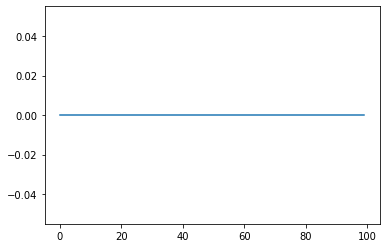

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

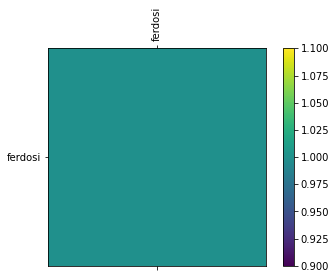

In [63]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000


def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [69]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))
        print(output)
        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


predict('بیاورد گرز گرانش را بدین سان')
predict('دلبرکم چیزی بگو')
predict('سلام')


> بیاورد گرز گرانش را بدین سان
tensor([[0.]])


RuntimeError: ignored